# Support Vector Machine (SVM)

This notebook is about demonstration of

- SVC (Support Vector Classifier)
- SVR (Support Vector Regression)

### What is SVC..?

It is a classifier that finds a hyperplane that has the maximum margin, i.e dicision boundary having maximum distance between data points of two classes.

Maximizing the margin distance provides some reinforcement so that future data points can be classified with more confidence.


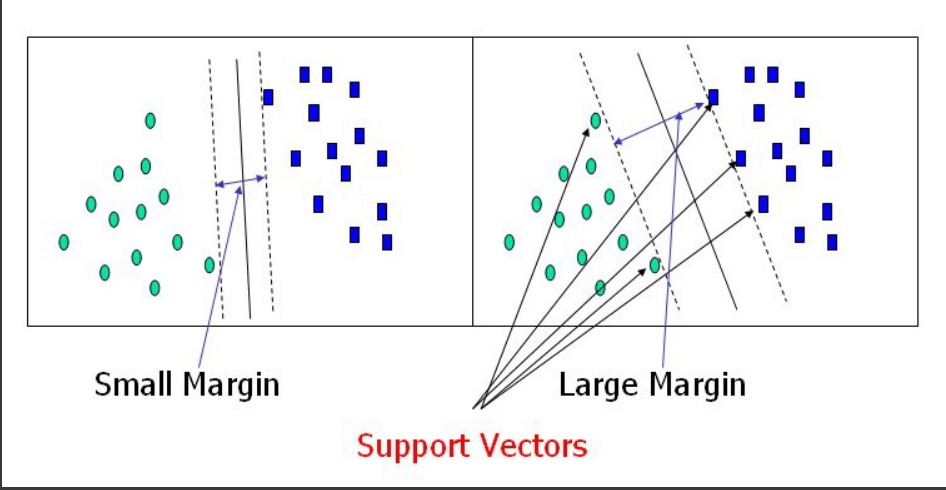


## The followings are important concepts in SVM:

### Support Vectors:

**Support vectors are the data points closest to the hyperplane. These data points will be used to define the dividing line.**

### Hyperplane:

**It is a decision plane or space that is divided between a collection of objects with various class designations.**

### Margin:

**The distance between two lines on the closet data points of various classes can be used to define margin. The perpendicular distance between the line and the support vectors can be used to calculate it. A large margin is considered good, whereas a small margin is considered bad.**


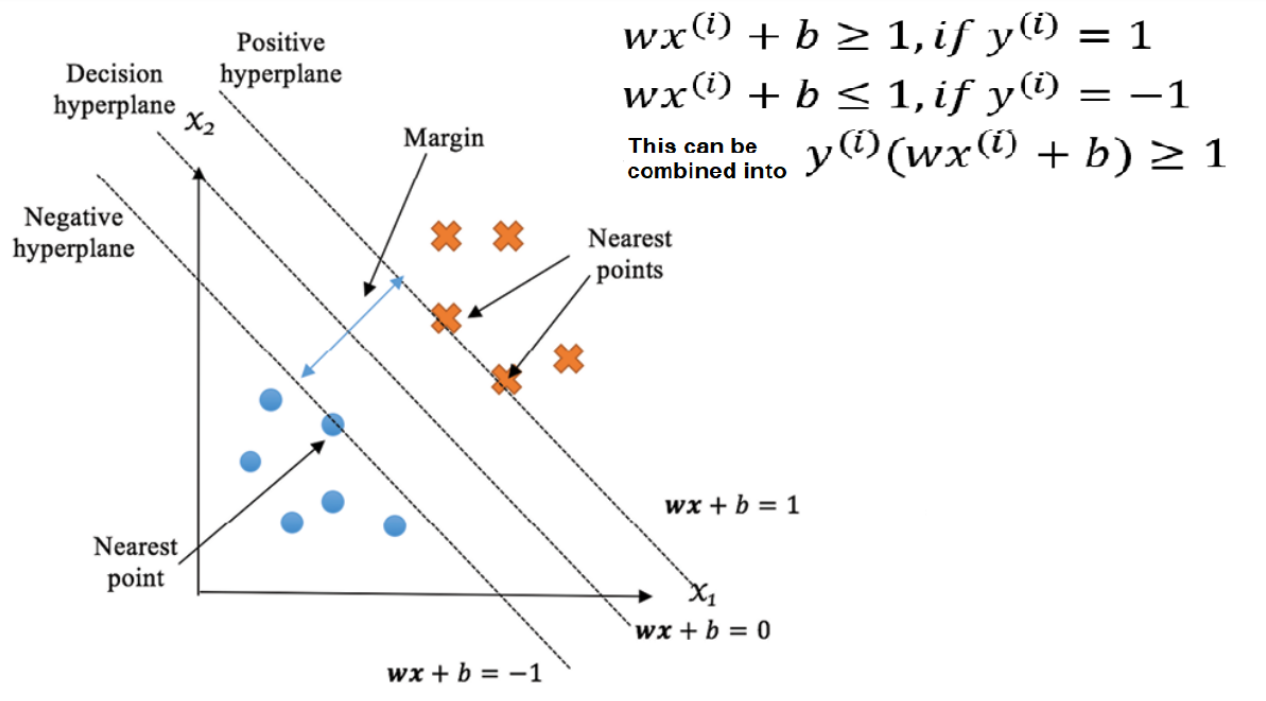


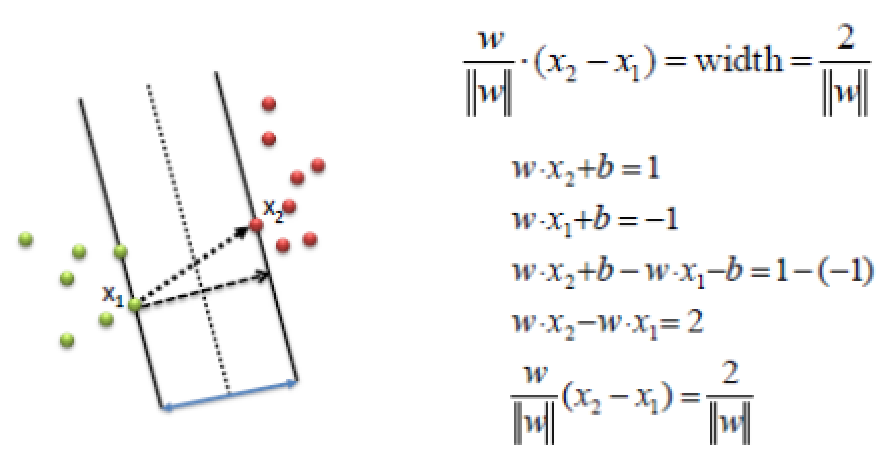


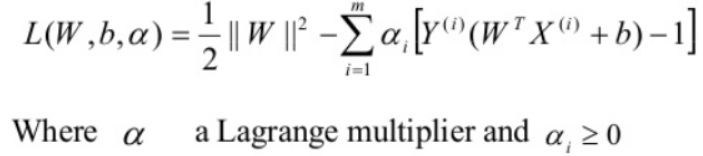


### Advantage

- SVM works relatively well when there is a clear margin of separation between classes.
- SVM is more effective in high dimensional spaces.
- SVM is effective in cases where the number of dimensions is greater than the number of samples.
- SVM is relatively memory efficient


In [2]:
# https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [3]:
import opendatasets as od

In [4]:
import pandas as pd
import os

In [5]:
os.listdir()

['kaggle.json',
 'lpm.pickle',
 'mlop-lab1.ipynb',
 'mloplab2svm.ipynb',
 'Untitled-1.ipynb']

In [6]:
dataset = "https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data"

In [7]:
od.download(dataset)

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data


100%|██████████| 48.6k/48.6k [00:00<00:00, 178kB/s]

In [8]:
os.listdir()

['breast-cancer-wisconsin-data',
 'kaggle.json',
 'lpm.pickle',
 'mlop-lab1.ipynb',
 'mloplab2svm.ipynb',
 'Untitled-1.ipynb']

In [9]:
df1 = pd.read_csv("./breast-cancer-wisconsin-data/data.csv")

In [10]:
df1.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [11]:
print(list(df1.columns))

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']


In [12]:
y = df1["diagnosis"]
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [13]:
y_num = pd.get_dummies(y)

In [14]:
y_num.tail()

,B,M
564,False,True
565,False,True
566,False,True
567,False,True
568,True,False


In [15]:
Y = y_num.M
Y

0       True
1       True
2       True
3       True
4       True
       ...  
564     True
565     True
566     True
567     True
568    False
Name: M, Length: 569, dtype: bool

In [16]:
import seaborn as sns
from matplotlib.figure import Figure

In [17]:
cols = ["radius_mean", "texture_mean", "perimeter_mean", "smoothness_mean"]

In [18]:
X_sel = pd.DataFrame(df1[cols].values, columns=cols)

In [19]:
X_sel.head()

,radius_mean,texture_mean,perimeter_mean,smoothness_mean
0,17.99,10.38,122.80,0.11840
1,20.57,17.77,132.90,0.08474
2,19.69,21.25,130.00,0.10960
3,11.42,20.38,77.58,0.14250
4,20.29,14.34,135.10,0.10030


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(X_sel, y)
clf = SVC(kernel="linear", C=1, random_state=42)
clf.fit(x_train, y_train)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.9370629370629371


### EDA


<Axes: >

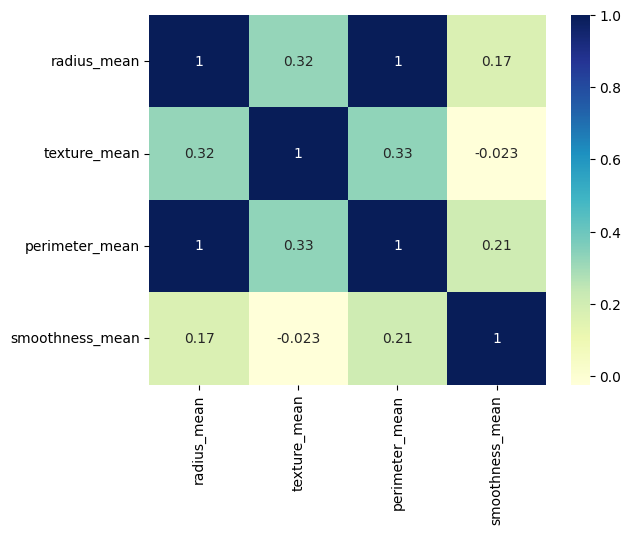

In [21]:
# Correlation
sns.heatmap(X_sel.corr(), cmap="YlGnBu", annot=True)

array([[<Axes: title={'center': 'radius_mean'}>,
        <Axes: title={'center': 'texture_mean'}>],
       [<Axes: title={'center': 'perimeter_mean'}>,
        <Axes: title={'center': 'smoothness_mean'}>]], dtype=object)

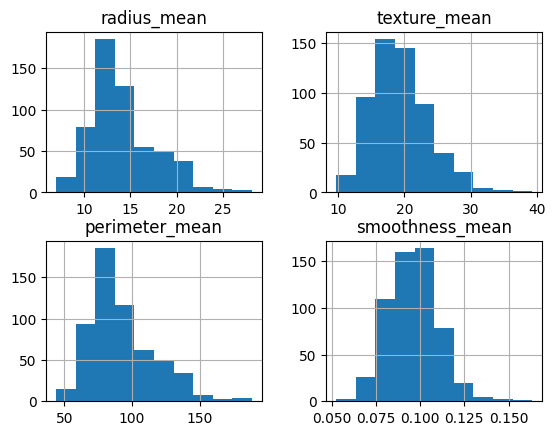

In [22]:
X_sel.hist()

## Soft margin

- Disadvantages of Hard Margin

  - Not Suitable for Non-linear Data
  - Sensitive to outliers (samples having error)

-

-

-

- **Soft Margin** SVM introduces flexibility by allowing some margin violations (misclassifications) to handle cases where the data is not perfectly separable.

- Math behind soft margin

Let us The equation introduces slack variables (𝜉𝑖)

yi (xT ωi +b) ≥ 1−ξi

The equation introduces slack variables (𝜉𝑖) to allow for some margin violations (misclassifications).

The term (1–𝜉𝑖) )represents the minimum required margin for each data point.

If a point falls within the margin or on the wrong side, its corresponding value becomes positive, reflecting the amount of violation.

The objective function of a soft margin SVM combines the margin maximization with a penalty term for margin violations.

minimizing:

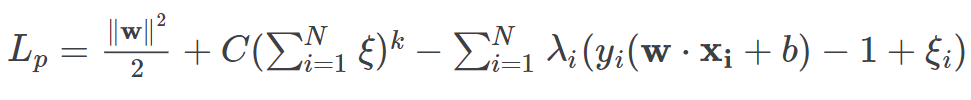

- Regularization Parameter: The regularization parameter (often denoted as C) controls the trade-off between the misclassification of training examples and the margin width. It helps prevent overfitting


## SVM Kernels

SVMs (Support Vector Machines) do exceptionally well at handling high-dimensional feature spaces and successfully navigating complex data distributions. They work by identifying support vectors, which are the closest data points to the decision boundary.In classification, it finds a hyperplane (linear decision boundary) that has the greatest margin of separation between classes. For regression, the goal is to fit a linear function that predicts continuous target variables. However, in the real world, all of the data cannot be separated linearly and is impossible to fit with a linear kernel function. When dealing with intricate, nonlinear data distributions, requires nonlinear SVM with kernel functions.

### How to handle non-linear classification

Nonlinear SVM addresses this limitation by utilizing kernel functions to map the data into a higher-dimensional space where linear separation becomes possible.

By leveraging the kernel trick, nonlinear SVM provides a powerful tool for solving classification problems where linear separation is insufficient, extending its applicability to a wide range of real-world scenarios.

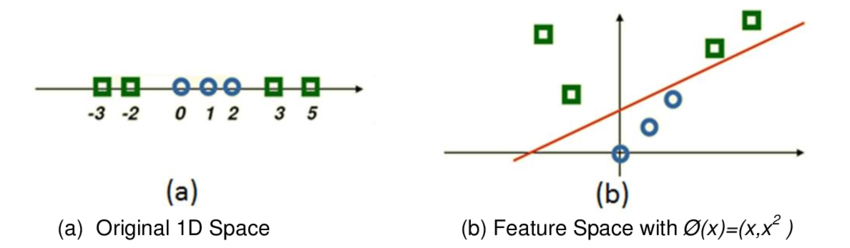

Another example:

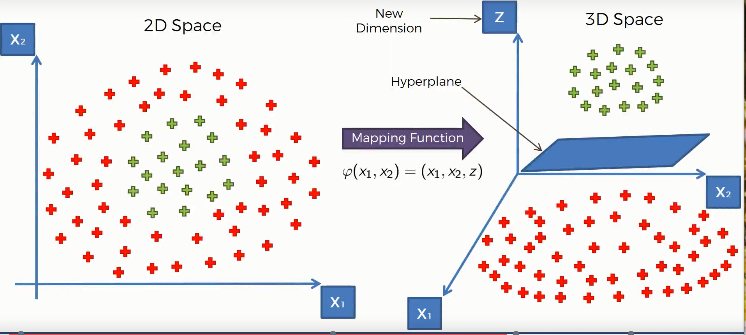


<Axes: xlabel='f1', ylabel='f2'>

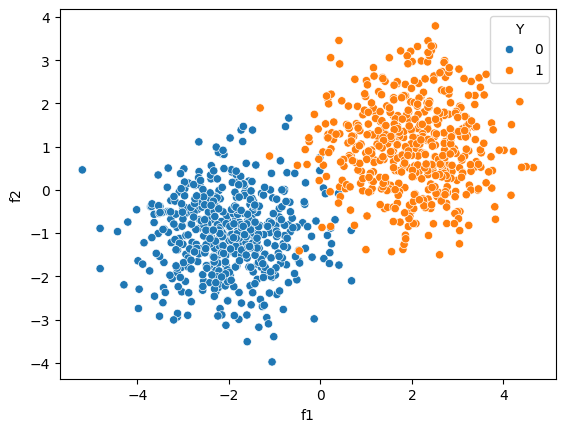

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(10)
x = np.r_[np.random.randn(500, 2) - [2, 1], np.random.randn(500, 2) + [2, 1]]
y = [0] * 500 + [1] * 500
XX = pd.DataFrame(x, columns=["f1", "f2"])
XX["Y"] = y
sns.scatterplot(data=XX, x="f1", y="f2", hue="Y")

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

x_train, x_test, y_train, y_test = train_test_split(x, y)

In [25]:
clf = SVC(kernel="linear", C=0.001, random_state=42)  # Take C=0.001, 0.01, 1, 10
clf.fit(x_train, y_train)
yp = clf.predict(x)
accuracy = clf.score(x_test, y_test)
print(accuracy)

0.984


In [26]:
w = clf.coef_[0]
c = clf.intercept_[0]
slope = -w[0] / w[1]
intercept = -c / w[1]
xx = np.linspace(-4, 4)
yy = intercept + slope * xx

margin = 1 / np.sqrt(np.sum(clf.coef_**2))  # 1/ L2 Norm of w

yy_down = (
    yy - np.sqrt(1 + slope**2) * margin
)  # margin away from hyperplane in direction perpendicular to hyperplane. This is sqrt(1+a^2) away vertically in
yy_up = yy + np.sqrt(1 + slope**2) * margin

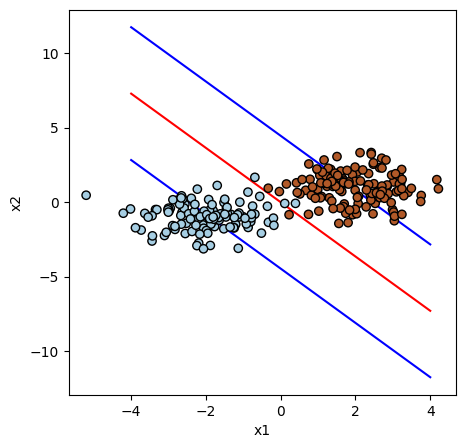

In [27]:
plt.figure(1, figsize=(5, 5))
plt.clf()
plt.plot(xx, yy, "r-")
plt.plot(xx, yy_down, "b-")
plt.plot(xx, yy_up, "b-")
# plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=20, facecolors="none", zorder=10, edgecolors="k")
plt.scatter(
    x_test[:, 0], x_test[:, 1], c=y_test, zorder=10, cmap=plt.cm.Paired, edgecolors="k"
)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [28]:
print(margin)

2.144307108643535
